In [2]:
import csv
import math
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [3]:
dataset_path = "/content/Housing_Price.csv"
df = pd.read_csv(dataset_path)

In [4]:
df.value_counts("ocean_proximity")

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
dtype: int64

In [ ]:
X = df

y = df['ocean_proximity']

In [ ]:
latitude	housing_median_age	total_rooms	total_bedrooms	population	households	median_income	median_house_value	ocean_proximity

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['ocean_proximity'] = le.fit_transform(X['ocean_proximity'])

y = le.transform(y)
y

array([3, 3, 3, ..., 1, 1, 1])

In [ ]:
X.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [13]:
# Assignment Stage

X1 = df.loc[:, ['median_income','total_rooms']].values
inertia = []
for n in range(1 , 11):
    model = KMeans(n_clusters = n,
               init='k-means++',
               max_iter=500,
               random_state=42)
    model.fit(X1)
    inertia.append(model.inertia_)

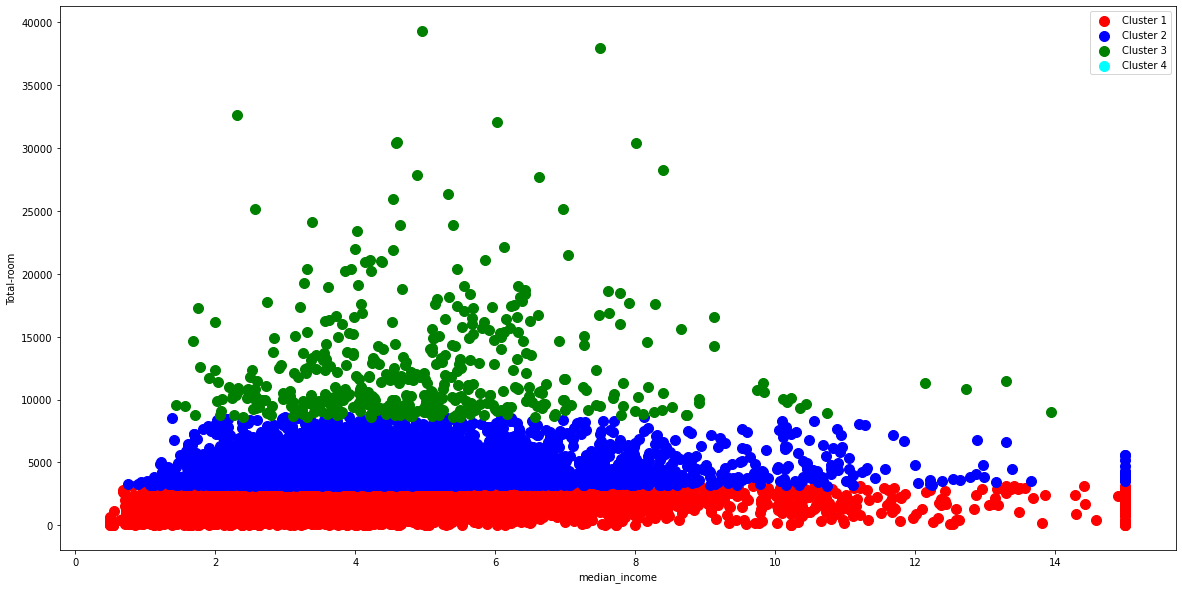

In [14]:
model = KMeans(n_clusters = 3,
            init='k-means++',
            max_iter=500,
            random_state=42)
model.fit(X1)
labels = model.labels_
centroids = model.cluster_centers_
y_kmeans = model.fit_predict(X1) 

plt.figure(figsize=(20,10))
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.title('Clusters of Customers - Age X Spending Score')
plt.ylabel('Total-room')
plt.xlabel('median_income')
plt.legend()
plt.show()